In [8]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import numpy as np

In [9]:
suicide_df = pd.read_csv("suicide_rates.csv")
economic_df = pd.read_csv("economic.csv")

suicide_df = suicide_df.rename(columns={"gdp_per_capita ($)":"gdp_per_capita"})
suicide_df.head()

#the two data sets have rows that represent different things, 
#and so we need to aggregate one and then create a key to merge them on


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
#concatenate "year" and "country" in the suicide rates file to a new column - 'key'
suicide_df['key'] = suicide_df['year'].astype(str) + "|" + suicide_df.country

#aggregate the data, grouped by the new key and reset the index so that the new key is an actual column and not the index
suicide_df_agg = suicide_df.groupby('key').agg({
    "gdp_per_capita": 'mean', 
    "suicides_no": 'sum',
    "suicides/100k pop" : 'mean',

}).reset_index()

suicide_df_agg.head()

# make sure they both have col called key with that val

,key,gdp_per_capita,suicides_no,suicides/100k pop
0,1985|Antigua and Barbuda,3850,0,0.000000
1,1985|Argentina,3264,1988,11.205833
2,1985|Australia,12374,1861,13.617500
3,1985|Austria,9759,2091,32.067500
4,1985|Bahamas,11393,1,0.396667


In [11]:
#concatenate "year" and "countries" in the economic file to a new column - 'key'
economic_df['key'] = suicide_df['year'].astype(str) + "|" + economic_df.countries




In [12]:
combined_df = pd.merge(suicide_df_agg,economic_df,how='inner',on='key')
combined_df.head(10)

,key,gdp_per_capita,suicides_no,suicides/100k pop,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,1985|Australia,12374,1861,13.617500,2005,AUS,Australia,8.07,10.0,1.0,...,9.440071,8.426222,8.176821,10.0,3.324660,7.481926,10.000000,8.359913,7.291367,8.550427
1,1985|Austria,9759,2091,32.067500,2005,AUT,Austria,7.85,14.0,1.0,...,9.554901,8.393422,8.386565,10.0,5.803007,8.145749,9.754512,5.905489,7.212824,7.624275
2,1985|Bahamas,11393,1,0.396667,2005,BHS,Bahamas,7.38,37.0,2.0,...,6.815573,4.261600,NaN,10.0,4.769231,6.343610,9.784213,NaN,NaN,7.424451
3,1985|Bahrain,9980,11,1.676667,2005,BHR,Bahrain,6.89,68.0,2.0,...,8.816727,8.373511,7.587719,10.0,4.630574,7.647951,9.430436,7.032164,4.825916,7.096172
4,1985|Barbados,6137,7,5.143333,2005,BRD,Barbados,6.31,93.0,3.0,...,6.286198,5.626678,5.208333,10.0,5.806095,6.660277,8.339361,7.212308,5.027839,6.859836
5,1985|Belgium,9356,2281,27.670000,2005,BEL,Belgium,7.41,35.0,1.0,...,9.529653,8.393422,8.069216,10.0,6.627103,8.272435,9.665691,6.640401,7.572510,7.959534
6,1985|Ecuador,2238,393,6.876667,1975,ECU,Ecuador,5.31,38.0,3.0,...,7.429392,4.066667,NaN,9.0,2.000000,5.022222,5.745746,NaN,NaN,NaN
7,1985|France,10765,12501,29.075000,2000,FRA,France,7.47,29.0,1.0,...,9.586504,9.180390,8.709175,10.0,8.007803,8.974342,9.785249,5.326292,8.362891,7.824811
8,1985|Malta,3639,2,0.730000,2002,MLT,Malta,6.88,54.0,2.0,...,6.965955,8.486667,7.833333,10.0,4.051282,7.592821,8.620487,6.666667,5.849206,7.045453
9,1985|Mauritius,1223,104,11.927500,2002,MUS,Mauritius,7.29,37.0,2.0,...,9.491014,4.286667,6.666667,10.0,6.127167,6.770125,8.827949,6.964769,5.935614,7.242777


In [13]:
#remove key column because it's not needed
combined_df = combined_df.drop(columns="key")
combined_df.head()


,gdp_per_capita,suicides_no,suicides/100k pop,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,12374,1861,13.617500,2005,AUS,Australia,8.07,10.0,1.0,4.719140,...,9.440071,8.426222,8.176821,10.0,3.324660,7.481926,10.000000,8.359913,7.291367,8.550427
1,9759,2091,32.067500,2005,AUT,Austria,7.85,14.0,1.0,4.577317,...,9.554901,8.393422,8.386565,10.0,5.803007,8.145749,9.754512,5.905489,7.212824,7.624275
2,11393,1,0.396667,2005,BHS,Bahamas,7.38,37.0,2.0,6.460052,...,6.815573,4.261600,NaN,10.0,4.769231,6.343610,9.784213,NaN,NaN,7.424451
3,9980,11,1.676667,2005,BHR,Bahrain,6.89,68.0,2.0,2.943336,...,8.816727,8.373511,7.587719,10.0,4.630574,7.647951,9.430436,7.032164,4.825916,7.096172
4,6137,7,5.143333,2005,BRD,Barbados,6.31,93.0,3.0,4.435294,...,6.286198,5.626678,5.208333,10.0,5.806095,6.660277,8.339361,7.212308,5.027839,6.859836


In [14]:
#create a final df for analysis that includes just the columns we need, with "countries" as the first column for posterity
final_df = combined_df[['countries','year','gdp_per_capita','suicides_no','suicides/100k pop', 'ECONOMIC FREEDOM',
                        'rank','4a_tariffs','4c_black_market','5b_labor_market_reg',
                        '5_regulation','1d_top_marg_tax_rate','2d_military_interference','2e_integrity_legal_system','5_regulation']]
final_df.head(10)

,countries,year,gdp_per_capita,suicides_no,suicides/100k pop,ECONOMIC FREEDOM,rank,4a_tariffs,4c_black_market,5b_labor_market_reg,5_regulation,1d_top_marg_tax_rate,2d_military_interference,2e_integrity_legal_system,5_regulation
0,Australia,2005,12374,1861,13.617500,8.07,10.0,8.426222,10.0,8.359913,8.550427,4.0,10.000000,9.791667,8.550427
1,Austria,2005,9759,2091,32.067500,7.85,14.0,8.393422,10.0,5.905489,7.624275,3.5,10.000000,10.000000,7.624275
2,Bahamas,2005,11393,1,0.396667,7.38,37.0,4.261600,10.0,NaN,7.424451,10.0,10.000000,7.500000,7.424451
3,Bahrain,2005,9980,11,1.676667,6.89,68.0,8.373511,10.0,7.032164,7.096172,10.0,5.000000,8.333333,7.096172
4,Barbados,2005,6137,7,5.143333,6.31,93.0,5.626678,10.0,7.212308,6.859836,3.5,9.400000,NaN,6.859836
5,Belgium,2005,9356,2281,27.670000,7.41,35.0,8.393422,10.0,6.640401,7.959534,1.0,10.000000,8.333333,7.959534
6,Ecuador,1975,2238,393,6.876667,5.31,38.0,4.066667,9.0,NaN,NaN,5.0,NaN,NaN,NaN
7,France,2000,10765,12501,29.075000,7.47,29.0,9.180390,10.0,5.326292,7.824811,1.0,8.333333,8.333333,7.824811
8,Malta,2002,3639,2,0.730000,6.88,54.0,8.486667,10.0,6.666667,7.045453,7.0,10.000000,8.333333,7.045453
9,Mauritius,2002,1223,104,11.927500,7.29,37.0,4.286667,10.0,6.964769,7.242777,8.0,10.000000,6.700000,7.242777


In [15]:
#remove any row with NaN
final_df_clean = final_df.dropna(how="any")
final_df_clean.head()

,countries,year,gdp_per_capita,suicides_no,suicides/100k pop,ECONOMIC FREEDOM,rank,4a_tariffs,4c_black_market,5b_labor_market_reg,5_regulation,1d_top_marg_tax_rate,2d_military_interference,2e_integrity_legal_system,5_regulation
0,Australia,2005,12374,1861,13.617500,8.07,10.0,8.426222,10.0,8.359913,8.550427,4.0,10.000000,9.791667,8.550427
1,Austria,2005,9759,2091,32.067500,7.85,14.0,8.393422,10.0,5.905489,7.624275,3.5,10.000000,10.000000,7.624275
3,Bahrain,2005,9980,11,1.676667,6.89,68.0,8.373511,10.0,7.032164,7.096172,10.0,5.000000,8.333333,7.096172
5,Belgium,2005,9356,2281,27.670000,7.41,35.0,8.393422,10.0,6.640401,7.959534,1.0,10.000000,8.333333,7.959534
7,France,2000,10765,12501,29.075000,7.47,29.0,9.180390,10.0,5.326292,7.824811,1.0,8.333333,8.333333,7.824811


In [16]:
#final dataframe grouped by year first to see which year has the most rows with data
final_df_clean.groupby(['year']).agg({
    'countries':'count'
})
final_df_clean.head()

,countries,year,gdp_per_capita,suicides_no,suicides/100k pop,ECONOMIC FREEDOM,rank,4a_tariffs,4c_black_market,5b_labor_market_reg,5_regulation,1d_top_marg_tax_rate,2d_military_interference,2e_integrity_legal_system,5_regulation
0,Australia,2005,12374,1861,13.617500,8.07,10.0,8.426222,10.0,8.359913,8.550427,4.0,10.000000,9.791667,8.550427
1,Austria,2005,9759,2091,32.067500,7.85,14.0,8.393422,10.0,5.905489,7.624275,3.5,10.000000,10.000000,7.624275
3,Bahrain,2005,9980,11,1.676667,6.89,68.0,8.373511,10.0,7.032164,7.096172,10.0,5.000000,8.333333,7.096172
5,Belgium,2005,9356,2281,27.670000,7.41,35.0,8.393422,10.0,6.640401,7.959534,1.0,10.000000,8.333333,7.959534
7,France,2000,10765,12501,29.075000,7.47,29.0,9.180390,10.0,5.326292,7.824811,1.0,8.333333,8.333333,7.824811


In [17]:
#which country has the most years worth of data for a time-series analysis?
final_df_clean.groupby(['countries']).agg({
    'year':'count'
})
final_df_clean.head()

,countries,year,gdp_per_capita,suicides_no,suicides/100k pop,ECONOMIC FREEDOM,rank,4a_tariffs,4c_black_market,5b_labor_market_reg,5_regulation,1d_top_marg_tax_rate,2d_military_interference,2e_integrity_legal_system,5_regulation
0,Australia,2005,12374,1861,13.617500,8.07,10.0,8.426222,10.0,8.359913,8.550427,4.0,10.000000,9.791667,8.550427
1,Austria,2005,9759,2091,32.067500,7.85,14.0,8.393422,10.0,5.905489,7.624275,3.5,10.000000,10.000000,7.624275
3,Bahrain,2005,9980,11,1.676667,6.89,68.0,8.373511,10.0,7.032164,7.096172,10.0,5.000000,8.333333,7.096172
5,Belgium,2005,9356,2281,27.670000,7.41,35.0,8.393422,10.0,6.640401,7.959534,1.0,10.000000,8.333333,7.959534
7,France,2000,10765,12501,29.075000,7.47,29.0,9.180390,10.0,5.326292,7.824811,1.0,8.333333,8.333333,7.824811


In [20]:
#the year 2016
most_rates = final_df_clean[final_df_clean['year'] == 2016].groupby('countries').agg({'suicides/100k pop' : 'mean',
                                                                                'gdp_per_capita' : 'mean'})
#highest and lowest suicude rates 2016
# suicide_rates = final_df_clean.groupby([“countries”, “year”])

# suicide_stats = suicide_rates[“year”]
highest_rates = suicide_rates['suicides/100k pop'].sum()

rates = pd.DataFrame({ “Suicide Rates” : highest_rates,})

#organizing the number of suicides highest to lowest
most_rates = rates.sort_values([“Highest Suicide Rates”], ascending=False).head()
most_rates.head()

SyntaxError: invalid character in identifier (<ipython-input-20-8558fe987ac2>, line 10)

Text(0.5, 1.0, 'Top Suicide Rates')

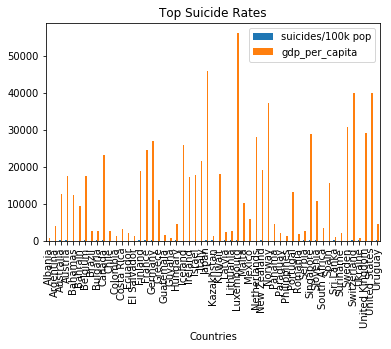

In [40]:
# bar graph for top 10 countries for rates and bottom 10 - 2 lines 
count_chart = most_rates.plot(kind = 'bar')
# set x amd y label 
count_chart.set_xlabel("Countries")
# count_chart.set_ylabel("Suicide Rates")
count_chart.set_title("Top Suicide Rates")


In [213]:
# suicide rates per generation
suicide_df.head()
suicide_df_clean = suicide_df.dropna(how = "any")
suicide_df_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation,key
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X,1995|Albania
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent,1995|Albania
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation,1995|Albania
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X,1995|Albania
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X,1995|Albania


In [300]:
gen_rates = suicide_df_clean[suicide_df_clean["country"] == 'United States'].groupby(['generation', 'sex'])\
.agg({'suicides/100k pop' : 'mean'})
gen_rates

suicides/100k pop
generation      sex                      
Boomers         female           6.793333
                male            25.518889
G.I. Generation female           6.035000
                male            43.361667
Generation X    female           5.366000
                male            20.682667
Generation Z    female           0.542000
                male             1.078000
Millenials      female           3.876154
                male            15.479231
Silent          female           4.970833
                male            30.497500

Text(0, 0.5, 'Generation')

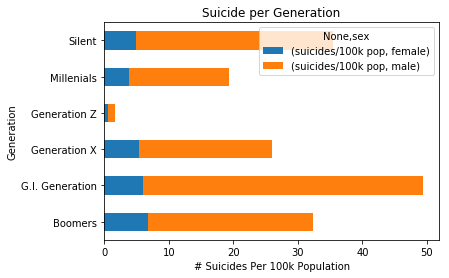

In [301]:
gen_rates.unstack('sex').plot(kind='barh', stacked=True)

plt.title("Suicide per Generation")
plt.xlabel("# Suicides Per 100k Population")
plt.ylabel("Generation")